#Data Pre-Processing

In [ ]:
import matplotlib as mpl                #Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams['figure.figsize']=(10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset from the drive
# Converting both 'nan' and '?' string data to numpy nan in the importing stage
# Merging both 'Date' and 'Time' columns to 'dt'
# Converting the data to time-series type by taking index to be the time

df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


##Dealing with missing values  'nan' with a test statistic

In [ ]:
# finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [ ]:
# double check to make sure that there are no more nan
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

#Plotting

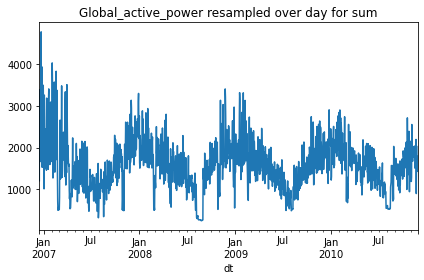

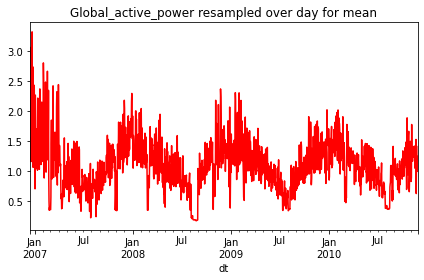

In [ ]:
# resampling over a day, and show the sum and mean of Global_active_power to get an understanding of the structure of data

df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red')
plt.tight_layout()
plt.show()

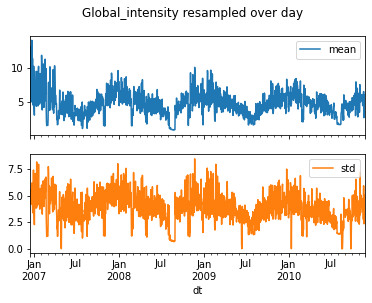

In [ ]:
# Below I show mean and std of 'Global_intensity' resampled over day

r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

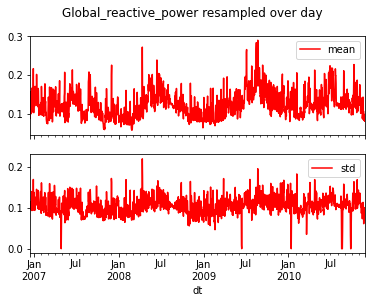

In [ ]:
# Below I show mean and std of 'Global_reactive_power' resampled over day

r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

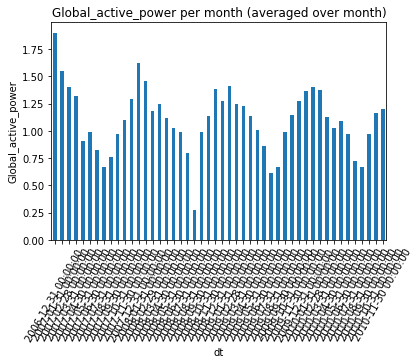

In [ ]:
# Sum of 'Global_active_power' resampled over month

df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

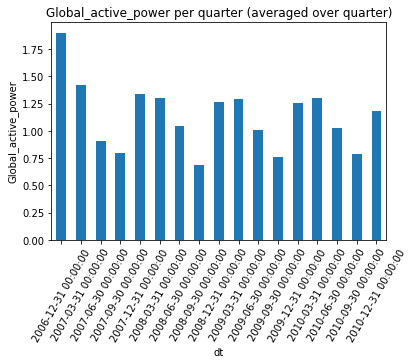

In [ ]:
# Mean of 'Global_active_power' resampled over quarter

df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

#Resampling

In [ ]:
df = df[['Global_active_power']]

In [ ]:
# resampling of data over hour
df_resample = df.resample('1h').mean()
df_resample.shape

(34589, 1)

In [ ]:
values = df_resample

#Divide into train and validation set

In [ ]:
train = values[:int(0.7*(len(values)))]
valid = values[int(0.7*(len(values))):]

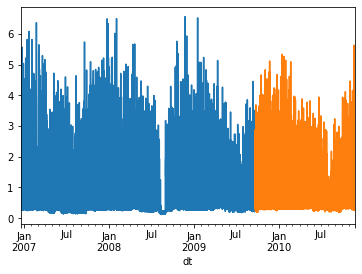

In [ ]:
train['Global_active_power'].plot()
valid['Global_active_power'].plot()

In [ ]:
print("shape of original dataset :", values.shape)
print("shape of train - training set", values.shape)
print("shape of valid - training set", values.shape)

shape of original dataset : (34589, 1)
shape of train - training set (34589, 1)
shape of valid - training set (34589, 1)


#Model Development

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima (train, start_p=2, start_q=2,
                           max_p=4, max_q=4, m=10,
                           start_P=0, seasonal=False,
                           d=1,max_d=1,  D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=False, n_jobs=-1 )

In [ ]:
model.fit(train)

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
model.summary()

#Forecasting

In [ ]:
forecast = model.predict(n_periods=len(valid))

In [ ]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#Plotting the predictions for validation set

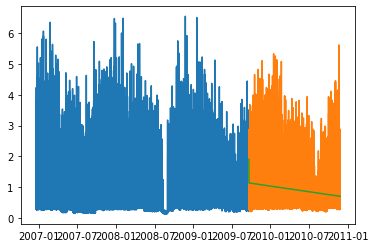

In [ ]:
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

#Calculating Accuracy

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


mse = mean_squared_error(valid,forecast)
print("MSE :" ,mse)

mae = mean_absolute_error(valid,forecast)
print("MAE :" ,mae)

rmse = np.sqrt(mse)
print("RMSE :" ,rmse)

MSE : 0.674612824255722
MAE : 0.6399339378433092
RMSE : 0.8213481748051322


In [ ]:
valid['Forecast'] = forecast['Prediction'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
valid

,Global_active_power,Forecast
dt,,
2009-09-20 13:00:00,2.496667,1.904815
2009-09-20 14:00:00,1.817433,1.607218
2009-09-20 15:00:00,1.536567,1.385125
2009-09-20 16:00:00,1.938800,1.267081
2009-09-20 17:00:00,1.784433,1.204331
...,...,...
2010-11-26 17:00:00,1.725900,0.697655
2010-11-26 18:00:00,1.573467,0.697613
2010-11-26 19:00:00,1.659333,0.697571
